<a href="https://colab.research.google.com/github/hasnanasa/AI-projects/blob/main/AIagent%203rd%20small%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END


In [141]:
class AgentState(TypedDict):
  number1 : int
  operation : str
  number2 : int
  finalNumber: int

In [142]:
def adder(state:AgentState) -> AgentState:
  state['finalNumber'] = state["number1"] + state["number2"]
  return state
def substractor(state:AgentState)->AgentState:
  state["finalNumber"] = state["number1"] - state["number2"]
  return state

In [143]:
def decide_next_node(state:AgentState) -> AgentState:
  if state["operation"] == "+" :
     return "addition_operation"
  elif state["operation"] == "-" :
       return "substraction_operation"

In [144]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("substract_node", substractor)
graph.add_node("router", lambda state:state)#passage through function
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
   {
     "addition_operation" : "add_node",
     "substraction_operation" : "substract_node"
   }

)

graph.add_edge("add_node", END)
graph.add_edge("substract_node", END)
app= graph.compile()




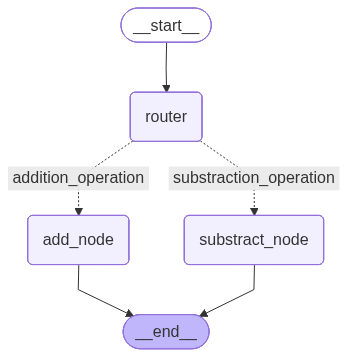

In [145]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [146]:
initial_state_2 = AgentState(number1= 14, operation= "+", number2= 4)
print(app.invoke(initial_state_2))

{'number1': 14, 'operation': '+', 'number2': 4, 'finalNumber': 18}
